# pyclust 包聚类
### 好处是有几个sklearn没有的聚类算法
### pypi官网有说明 https://pypi.org/project/pyclust/0.1.3/
### 且包里的距离函数可以定义，因为用了算法采用了 scipy.spatial.distance.cdist()函数
### 所以通过metric参数指定计算距离的不同方式得到不同的距离度量值。

### metric不同取值对应的距离如下：

### braycurtis----------Bray-Curtis 距离
### canberra---------- 堪培拉距离
### chebyshev----------切比雪夫距离
### cityblock----------曼哈顿距离
### correlation----------相关距离
### cosine----------余弦距离
### dice----------布尔向量之间的骰子距离
### euclidean----------欧几里得距离（欧氏距离）
### hamming----------归一化汉明距离
### jaccard----------杰卡德相似系数
### kulsinski----------布尔向量之间的 Kulsinski 距离
### mahalanobis----------马氏距离
### matching---------- 同汉明距离
### minkowski----------闵可夫斯基距离（明氏距离）
### rogerstanimoto----------布尔向量之间的 Rogers-Tanimoto 距离
### russellrao----------布尔向量之间的 Russell-Rao 距离
### seuclidean----------标准欧几里得距离
### sokalmichener----------布尔向量之间的索卡尔-米切纳距离
### sokalsneath----------矢量之间的 Sokal-Sneath 距离
### sqeuclidean----------平方欧几里得距离
### wminkowski----------向量之间的加权明氏距离
###  yule----------布尔向量之间的圣诞距离？
原文链接：https://blog.csdn.net/yps184/article/details/117772044

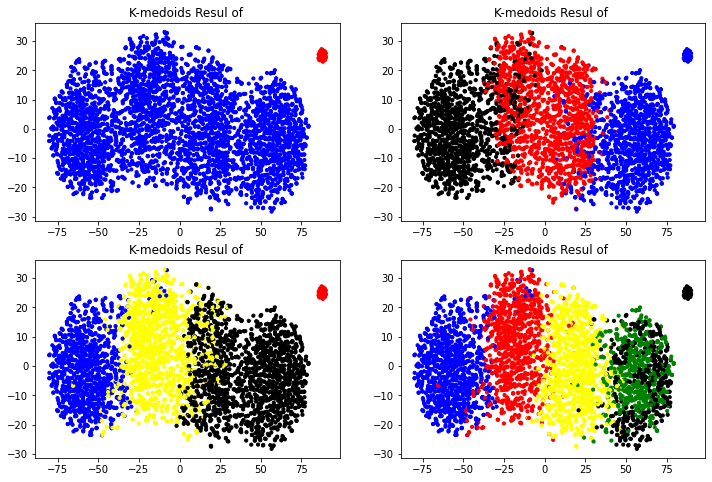

In [1]:


# !pip install treelib
# !pip install pyclust

from pyclust import KMedoids
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

'''构造示例数据集（加入少量脏数据）'''
data1 = np.random.normal(0,0.9,(1000,10))
data2 = np.random.normal(1,0.9,(1000,10))
data3 = np.random.normal(2,0.9,(1000,10))
data4 = np.random.normal(3,0.9,(1000,10))
data5 = np.random.normal(50,0.9,(50,10))

data = np.concatenate((data1,data2,data3,data4,data5))

'''准备可视化需要的降维数据'''
data_TSNE = TSNE(learning_rate=100).fit_transform(data)

'''对不同的k进行试探性K-medoids聚类并可视化'''
plt.figure(figsize=(12,8))
for i in range(2,6):
    k = KMedoids(n_clusters=i,distance='euclidean',max_iter=1000).fit_predict(data)
    colors = ([['red','blue','black','yellow','green'][i] for i in k])
    plt.subplot(219+i)
    plt.scatter(data_TSNE[:,0],data_TSNE[:,1],c=colors,s=10)
    plt.title('K-medoids Resul of '.format(str(i)))

plt.show()

